## Clustering de Clientes por Consumo de Energia - Análise dos Dados

#### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#### Dataset

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

#### 1. Análise dos dados

In [2]:
df = pd.read_csv('..\data\household_power_consumption.txt', sep=';', low_memory=False, na_values='?')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [4]:
df.isna().any()

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [5]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Temos as datas e as horas dos dados nulos, talvez se houver alguma correlação temporal positiva ou negativa podemos preencher esses valores missing com foward fill ou backward fill

In [6]:
df_aux = df.drop('Time', axis=1)
df_aux['Date_metering'] = df_aux['Date']

for col in df_aux.columns:
    if col not in ['Date','Date_metering']:
        
        df_aux[col+'sum'] = df_aux.groupby(['Date'])[[col]].transform('sum')
        df_aux.drop(col, axis=1, inplace=True)

df_aux = df_aux.set_index('Date').to_period('M').sort_index()
df_aux.drop_duplicates(inplace=True)
df_aux.head()

,Date_metering,Global_active_powersum,Global_reactive_powersum,Voltagesum,Global_intensitysum,Sub_metering_1sum,Sub_metering_2sum,Sub_metering_3sum
Date,,,,,,,,
2006-12,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


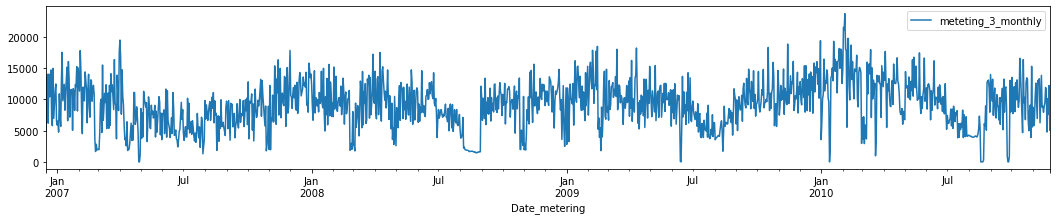

In [7]:
# Estava buscando enxergar algum padrão para lidar com os dados missing
# Com este plot é possível retirar alguns insights: mês de dezembro, janeiro, fevereiro, março temos alto consumo
# mês de maio, junho, julho, agosto, temos baixo consumo
# não ocorreu nenhuma idéa de como preencher os dados missing com backfill ou fowardfill
# Em seguida sera feita uma análise por hora dentro do mesmo dia, para verifica a possibilidade de preencher o
temp = pd.Series(data=df_aux['2006-12':'2010-11']['Sub_metering_3sum'].values, 
                 index=df_aux['2006-12':'2010-11']['Date_metering'])

temp.plot(figsize=(18, 3), label="meteting_3_monthly", legend=True)

plt.show()

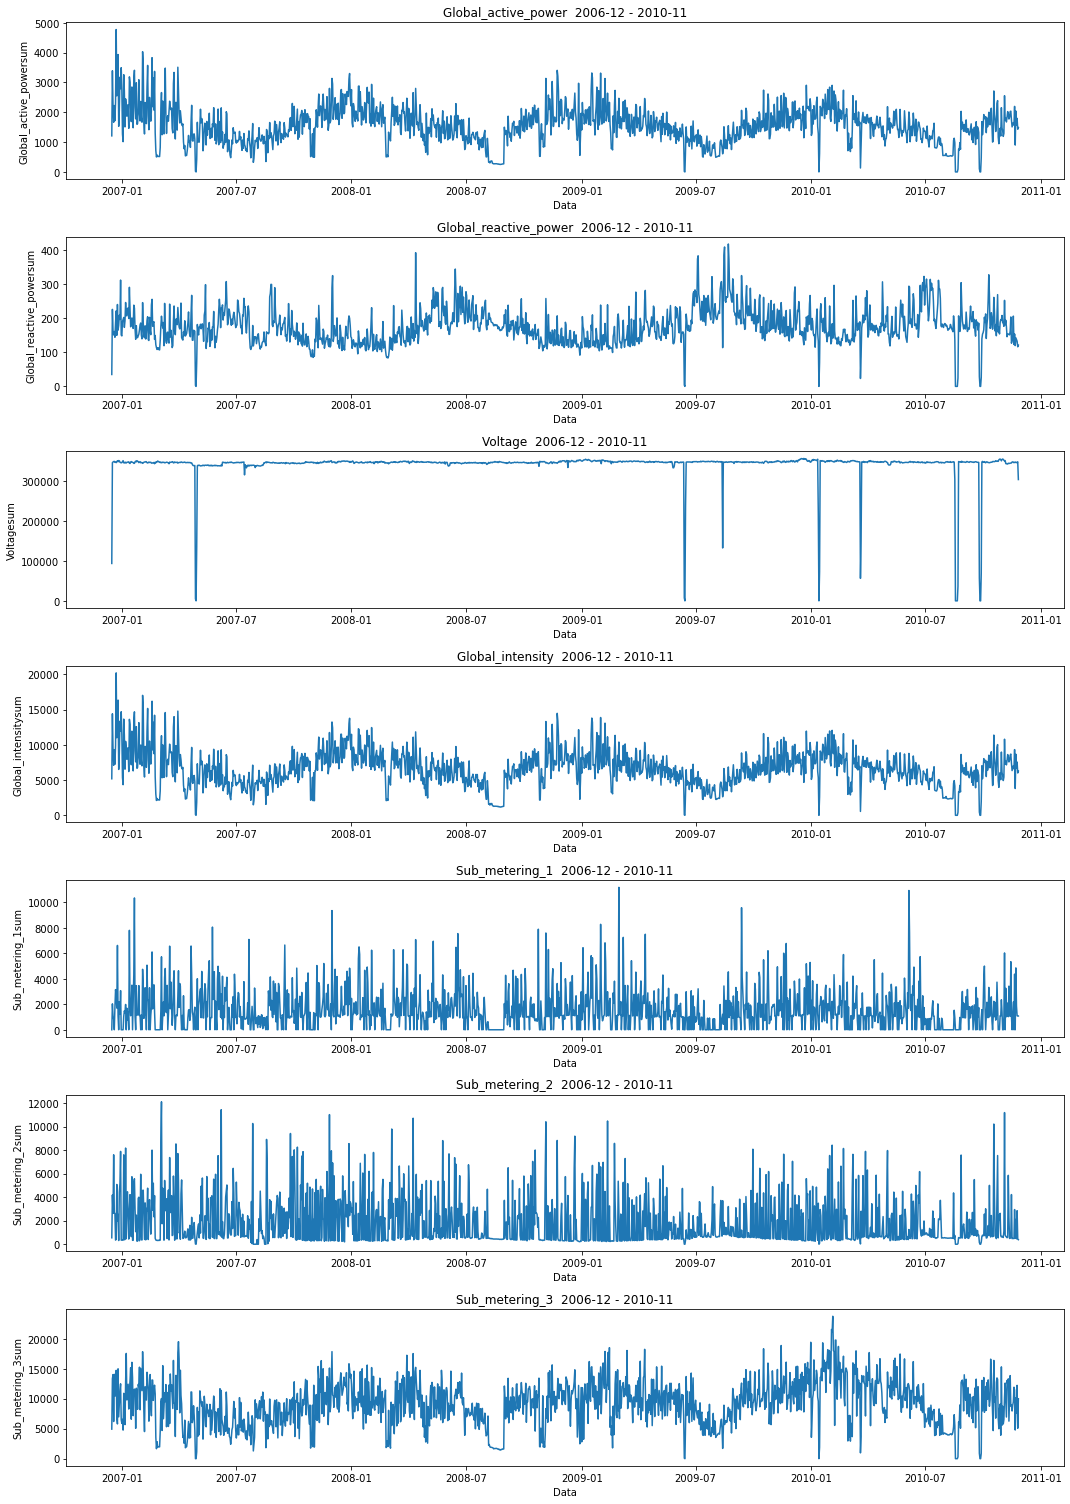

In [8]:
# Gráficos da evolução das variáveis no tempo

# Definindo o tamanho do gráfico
'fig = plt.figure()
fig.set_figheight(21)
fig.set_figwidth(15)'

for i, col in enumerate(df_aux.columns):
    if col != 'Date_metering':   
        
        plt.subplot(7,1,i)
        plt.plot(df_aux['2006-12':'2010-11']['Date_metering'], df_aux['2006-12':'2010-11'][col].values)
        plt.title(col[:-3]+'  2006-12 - 2010-11')
        plt.xlabel('Data')
        plt.ylabel(col)

del df_aux

fig.tight_layout()
plt.show()

É possível identificar padrões cíclicos em algumas variáveis, mas não em todas. Visto isso, mais algumas análises serão feitas antes de decidir o algoritmo de imputação de dados

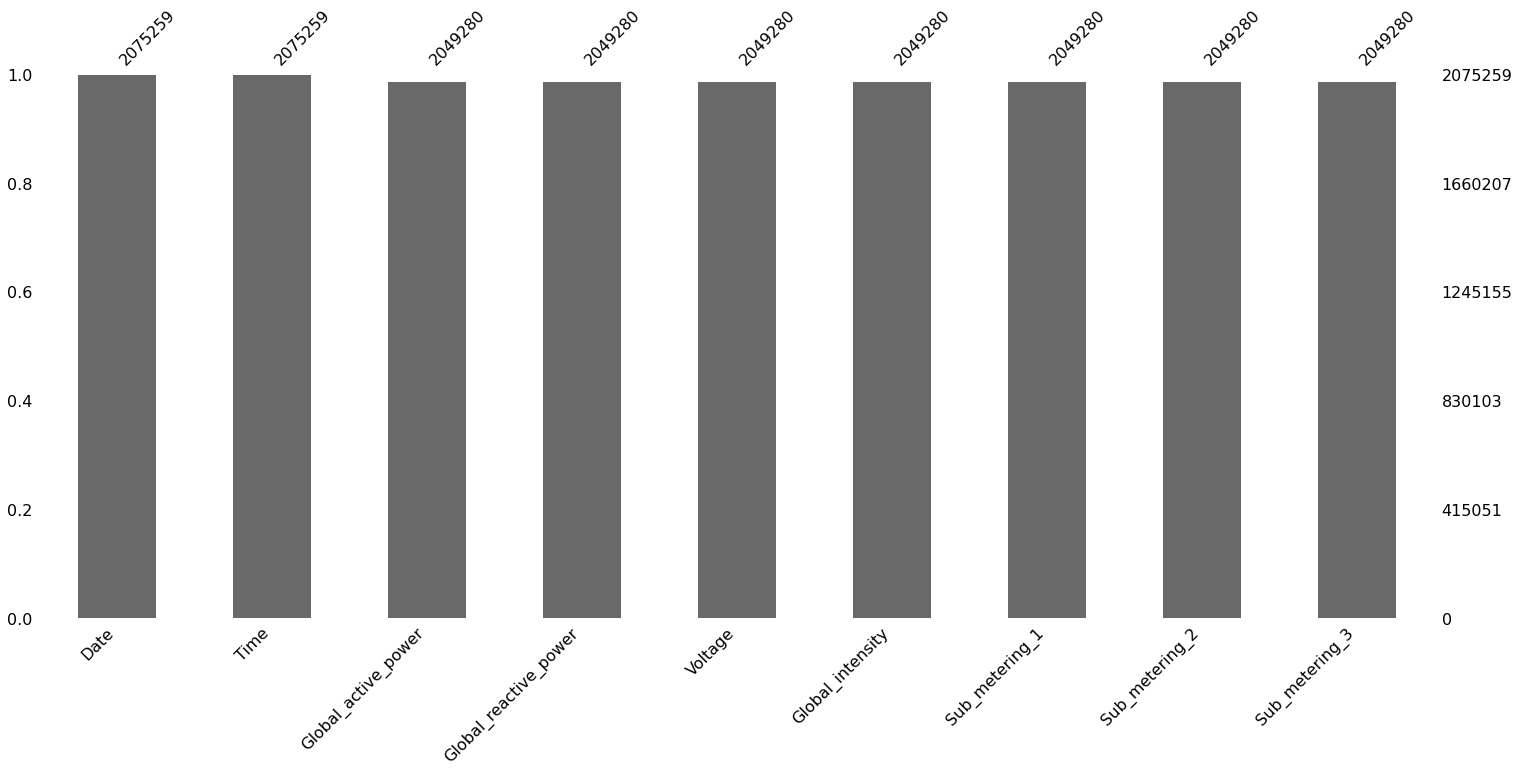

In [9]:
msno.bar(df);

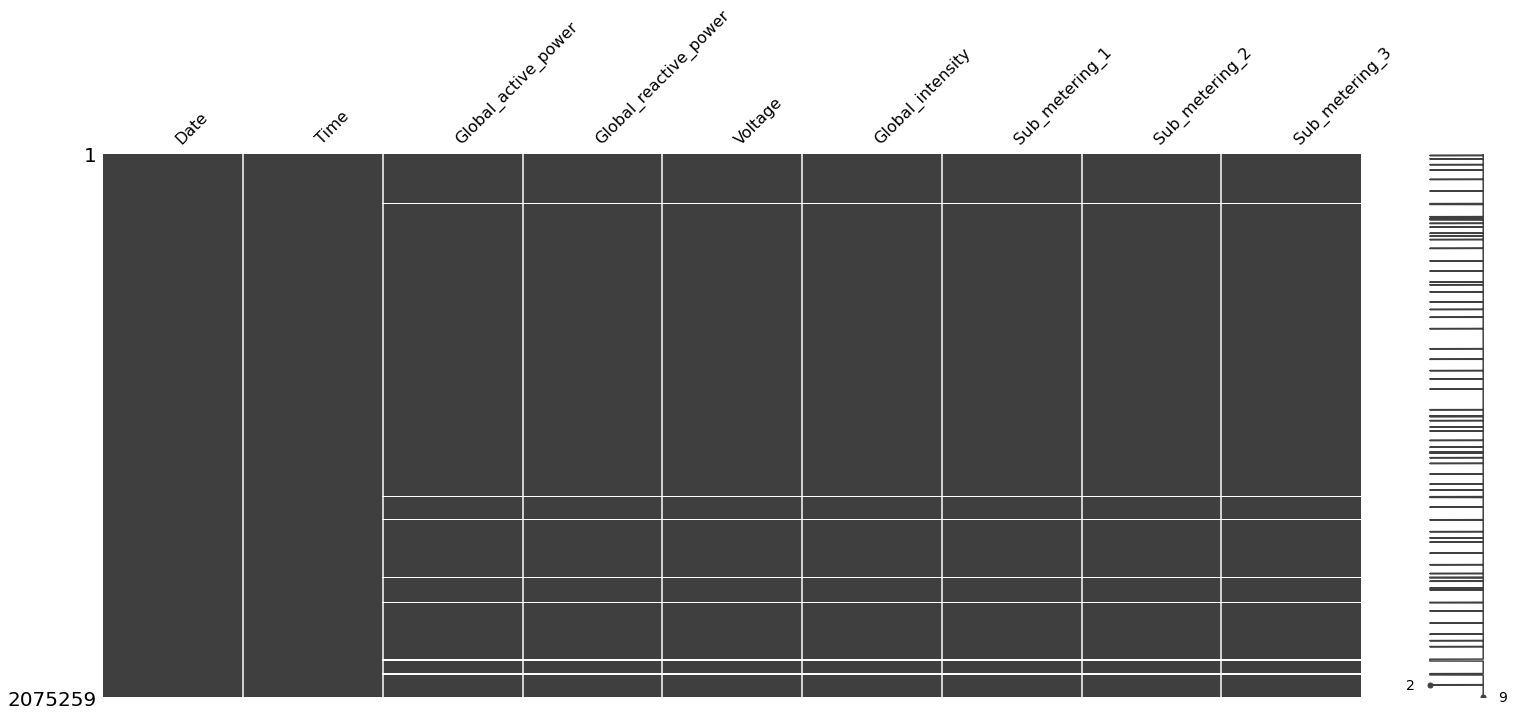

In [10]:
msno.matrix(df);

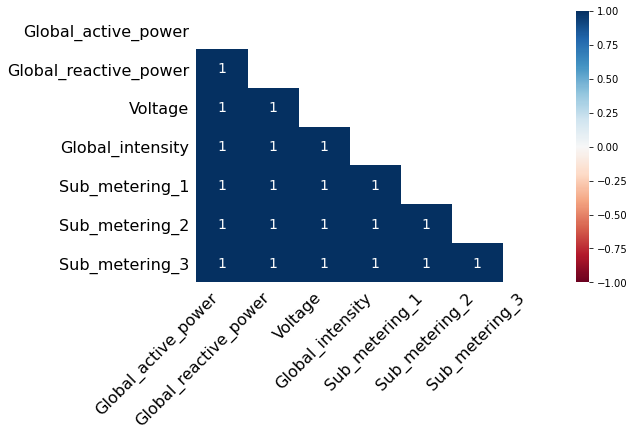

In [11]:
msno.heatmap(df, figsize=(8,5));

Os dados apresentam MNAR(Missing Not At Random), como os dados missing representam menos de 5% do total de linhas, esses valores serão removidos do dataset

In [12]:
df.dropna(inplace = True)

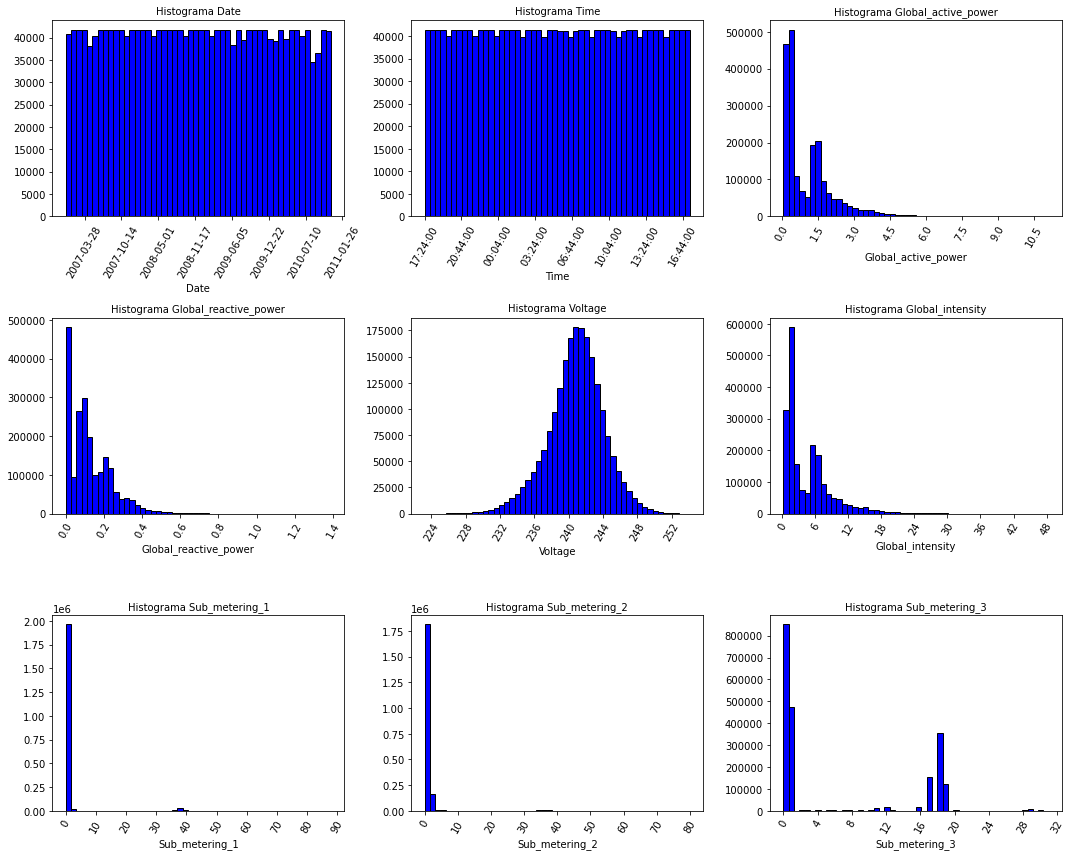

In [13]:
# Observando a distribuição das variáveis
# Definindo o tamanho do gráfico
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

# Gerando os plots
for i, col in enumerate(df.columns):
    
    plt.subplot(3,3,i+1)
    plt.hist(df[col], color = 'blue', edgecolor = 'black', bins = int(50))

    plt.title('Histograma '+ str(col), fontdict={'fontsize':10})
    plt.xlabel(col)
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.xticks(rotation=60)

    
fig.tight_layout()
plt.show()

Os histogramas mostram que a distribuição de valores para variável "Voltage" apresenta quase uma curva Gaussiana perfeita.
Podemos ver também que as medições foram feitas de maneira equilibrada levando em consideração Data/Hora

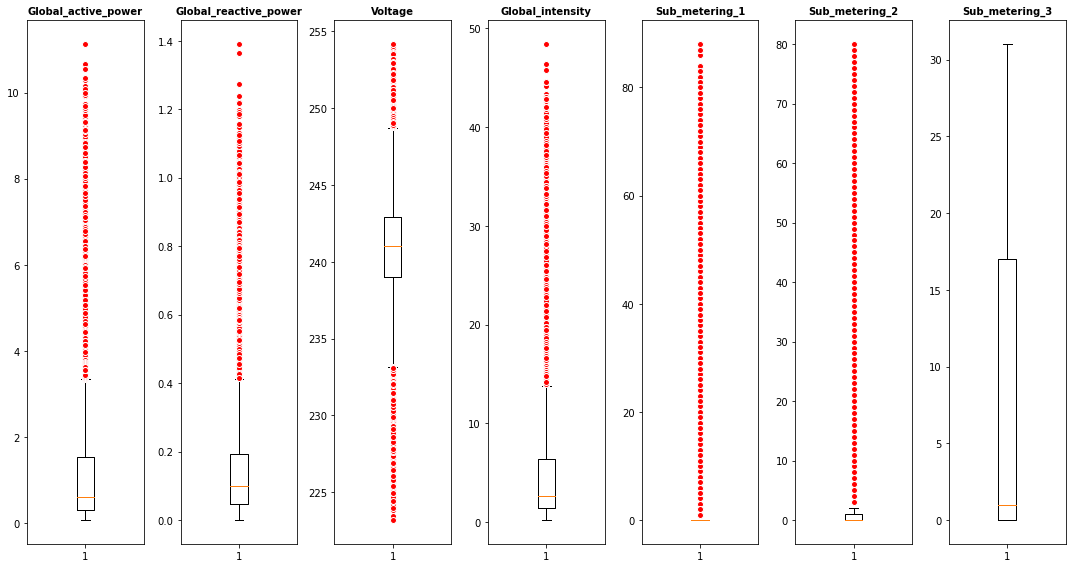

In [14]:
# Boxplots
df_boxplot = df.drop(['Date', 'Time'], axis=1)

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_boxplot.columns), figsize=(15,8))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_boxplot.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_boxplot.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

O Dataset apresenta uma quantidade considerável de outliers

In [15]:
# Salvando as alterações no dataframe
df.to_csv('..\data\household_power_consumption_nonavalues.txt', index=False)